# Task 1

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
p_train = pd.read_csv("/content/S1_p300_Train.csv", header=None)
np_train = pd.read_csv("/content/S1_np300_Train.csv", header=None)

p_test = pd.read_csv("/content/S1_p300_Test.csv", header=None)
np_test = pd.read_csv("/content/S1_np300_Test.csv", header=None)

In [3]:
X_train = pd.concat([p_train, np_train], axis=0)
y_train = np.concatenate([
    np.ones(len(p_train)),
    np.zeros(len(np_train))
])

X_test = pd.concat([p_test, np_test], axis=0)
y_test = np.concatenate([
    np.ones(len(p_test)),
    np.zeros(len(np_test))
])

X_train = X_train.values
X_test = X_test.values

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2880, 140)
Test shape: (2880, 140)


In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        18,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,417 (111.00 KB)

 Trainable params: 28,417 (111.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6719 - loss: 0.6432 - val_accuracy: 0.8646 - val_loss: 0.4288
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8215 - loss: 0.4865 - val_accuracy: 0.8594 - val_loss: 0.4033
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8251 - loss: 0.4544 - val_accuracy: 0.8542 - val_loss: 0.4281
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8307 - loss: 0.4441 - val_accuracy: 0.8542 - val_loss: 0.4075
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.4310 - val_accuracy: 0.8594 - val_loss: 0.4260
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8283 - loss: 0.4114 - val_accuracy: 0.8559 - val_loss: 0.4246
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8315 - loss: 0.4038 - val_accuracy: 0.8559 - val_loss: 0.3954
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.3985 - val_accuracy: 0.8594 - val_loss

In [8]:
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7802083333333333
ROC AUC: 0.4856015625

Classification Report:

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      2400
         1.0       0.20      0.11      0.14       480

    accuracy                           0.78      2880
   macro avg       0.52      0.51      0.51      2880
weighted avg       0.73      0.78      0.75      2880



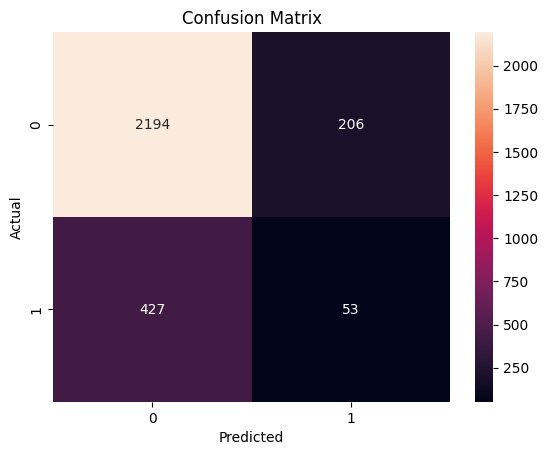

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

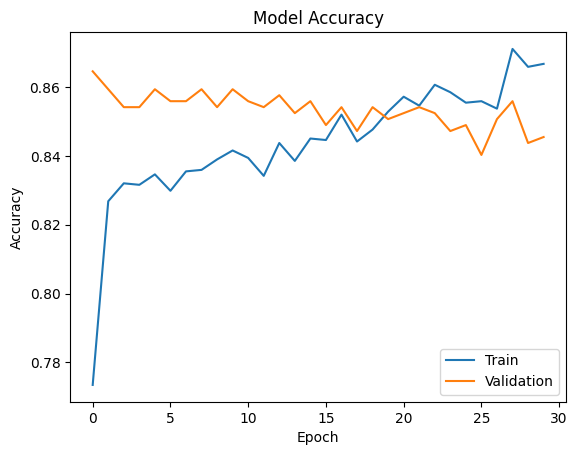

In [10]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

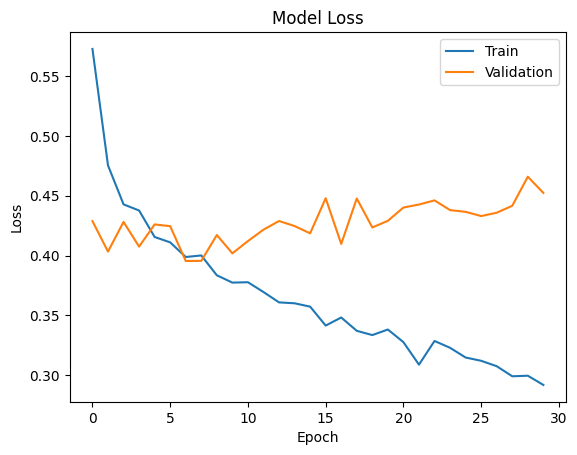

In [11]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

# Task 2

Input → h1 → h2 → Output

In [12]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def build_model(learning_rate=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # h1
        Dense(32, activation='relu'),  # h2
        Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

full batch

In [14]:
batch_model = build_model()

history_batch = batch_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=len(X_train),
    verbose=1
)

batch_weights = batch_model.layers[1].get_weights()[0]

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.6281 - loss: 0.6666
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6503 - loss: 0.6619
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6674 - loss: 0.6576
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6830 - loss: 0.6534
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6941 - loss: 0.6495


stochastic

In [15]:
sgd_model = build_model()

history_sgd = sgd_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=1,
    verbose=1
)

sgd_weights = sgd_model.layers[1].get_weights()[0]

Epoch 1/5
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7951 - loss: 0.5693
Epoch 2/5
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8343 - loss: 0.4209
Epoch 3/5
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8353 - loss: 0.4030
Epoch 4/5
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8316 - loss: 0.3804
Epoch 5/5
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8405 - loss: 0.3691


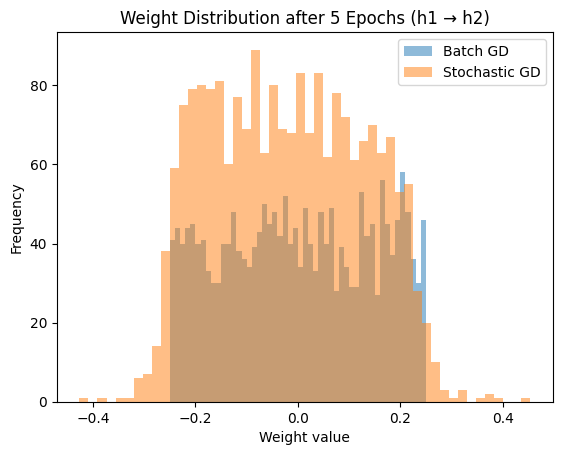

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(batch_weights.flatten(), bins=50, alpha=0.5, label="Batch GD")
plt.hist(sgd_weights.flatten(), bins=50, alpha=0.5, label="Stochastic GD")
plt.title("Weight Distribution after 5 Epochs (h1 → h2)")
plt.xlabel("Weight value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [17]:
batch_mean = abs(batch_weights).mean()
sgd_mean = abs(sgd_weights).mean()

print("Mean |weights| (Batch GD):", batch_mean)
print("Mean |weights| (SGD):", sgd_mean)

Mean |weights| (Batch GD): 0.1248238
Mean |weights| (SGD): 0.12686001


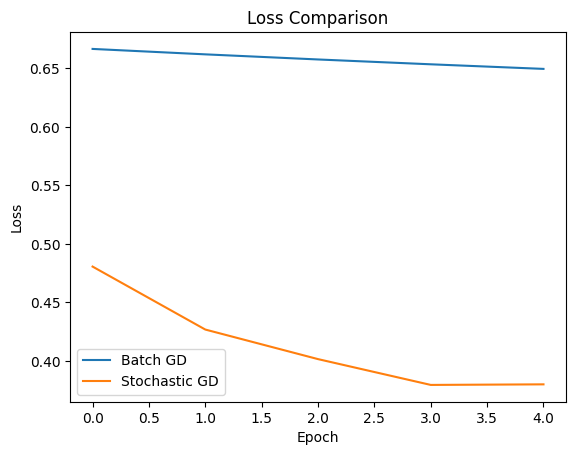

In [18]:
plt.figure()
plt.plot(history_batch.history['loss'], label='Batch GD')
plt.plot(history_sgd.history['loss'], label='Stochastic GD')
plt.title("Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Task 3

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [20]:
y_train = y_train.reshape(-1, 1)

In [21]:
def build_l1_model():
    model = Sequential([
        Dense(64, activation='relu',
              input_shape=(X_train.shape[1],),
              kernel_regularizer=regularizers.l1(0.001)),  # L1
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l1(0.001)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

l1_model = build_l1_model()

history_l1 = l1_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    verbose=1
)

# Extract weights between h1 → h2
l1_weights = l1_model.layers[1].get_weights()[0]

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6065 - loss: 1.6966
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8333 - loss: 1.3703
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8389 - loss: 1.2182
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 1.0991
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8403 - loss: 1.0005
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8341 - loss: 0.9189
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.8526
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.7861
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.7181
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.6723
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8385 - loss: 0.6394
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - lo

In [22]:
def build_l2_model():
    model = Sequential([
        Dense(64, activation='relu',
              input_shape=(X_train.shape[1],),
              kernel_regularizer=regularizers.l2(0.001)),  # L2
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l2(0.001)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

l2_model = build_l2_model()

history_l2 = l2_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    verbose=1
)

l2_weights = l2_model.layers[1].get_weights()[0]

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7840 - loss: 0.7531
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.5784
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8423 - loss: 0.5450
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8435 - loss: 0.5005
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8178 - loss: 0.5293
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8400 - loss: 0.4781
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8491 - loss: 0.4657
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8441 - loss: 0.4602
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8497 - loss: 0.4493
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.4566
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.4303
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - lo

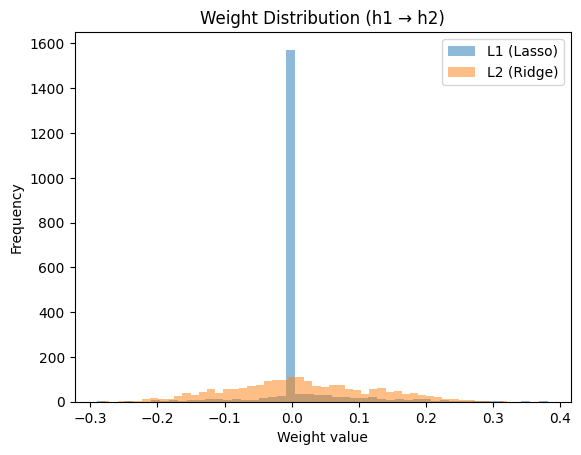

In [23]:
plt.figure()
plt.hist(l1_weights.flatten(), bins=50, alpha=0.5, label="L1 (Lasso)")
plt.hist(l2_weights.flatten(), bins=50, alpha=0.5, label="L2 (Ridge)")
plt.title("Weight Distribution (h1 → h2)")
plt.xlabel("Weight value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [24]:
l1_mean = np.mean(np.abs(l1_weights))
l2_mean = np.mean(np.abs(l2_weights))

print("Mean |weights| with L1:", l1_mean)
print("Mean |weights| with L2:", l2_mean)

Mean |weights| with L1: 0.022321433
Mean |weights| with L2: 0.08552881


In [25]:
l1_zeros = np.sum(np.abs(l1_weights) < 1e-4)
l2_zeros = np.sum(np.abs(l2_weights) < 1e-4)

print("Near-zero weights (L1):", l1_zeros)
print("Near-zero weights (L2):", l2_zeros)

Near-zero weights (L1): 601
Near-zero weights (L2): 1


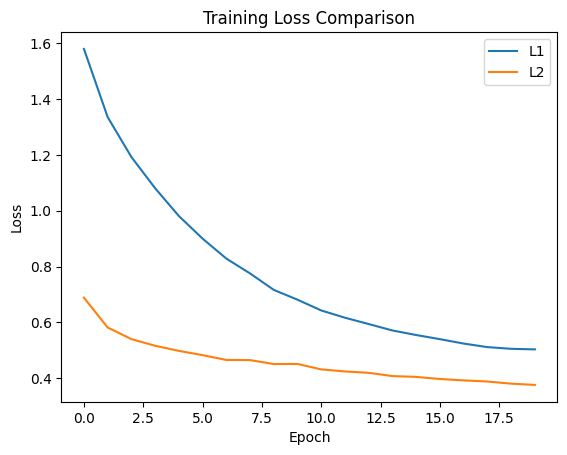

In [26]:
plt.figure()
plt.plot(history_l1.history['loss'], label='L1')
plt.plot(history_l2.history['loss'], label='L2')
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()